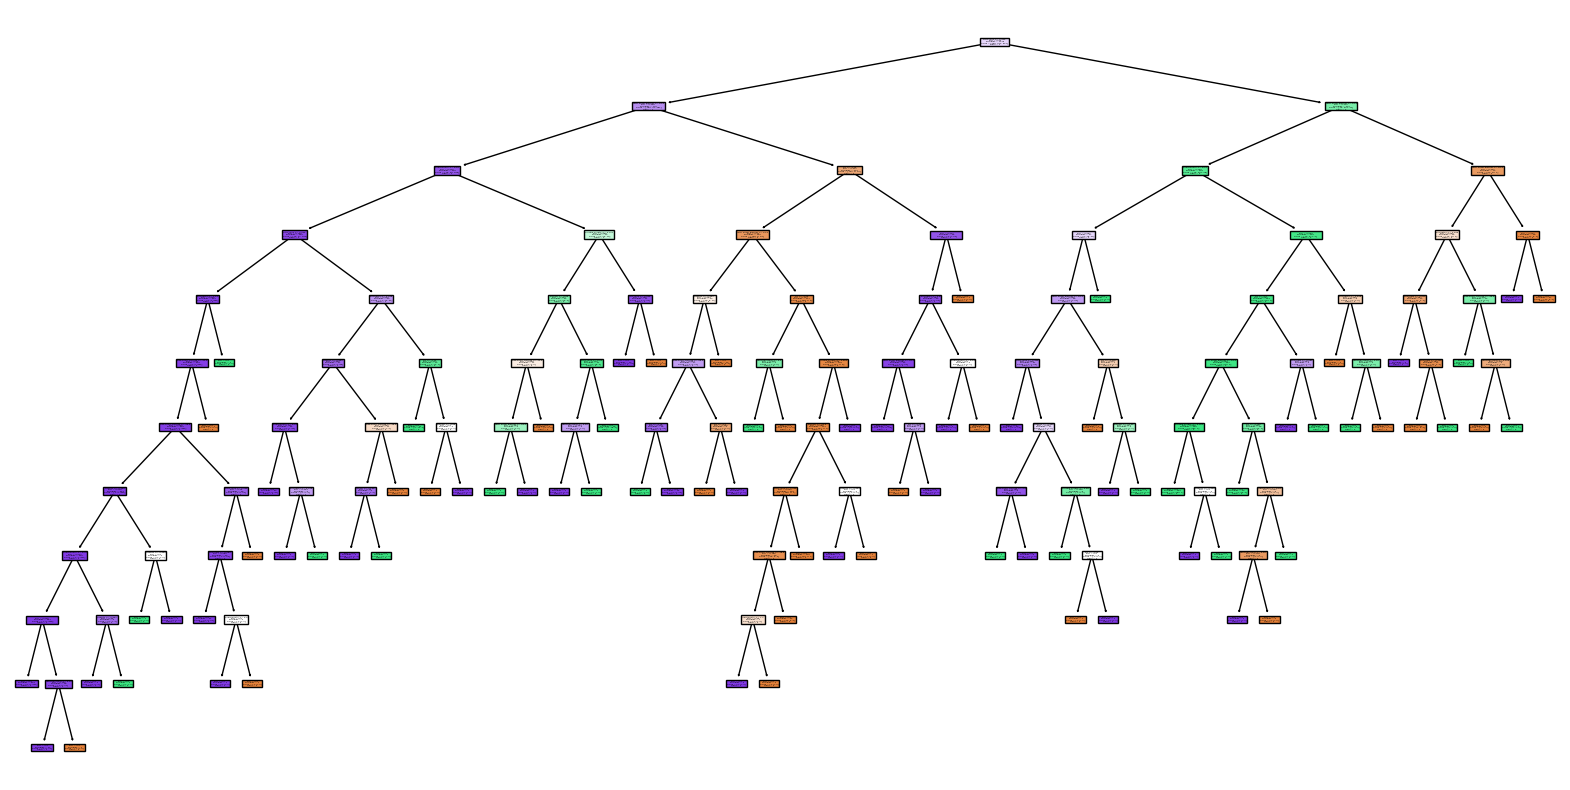

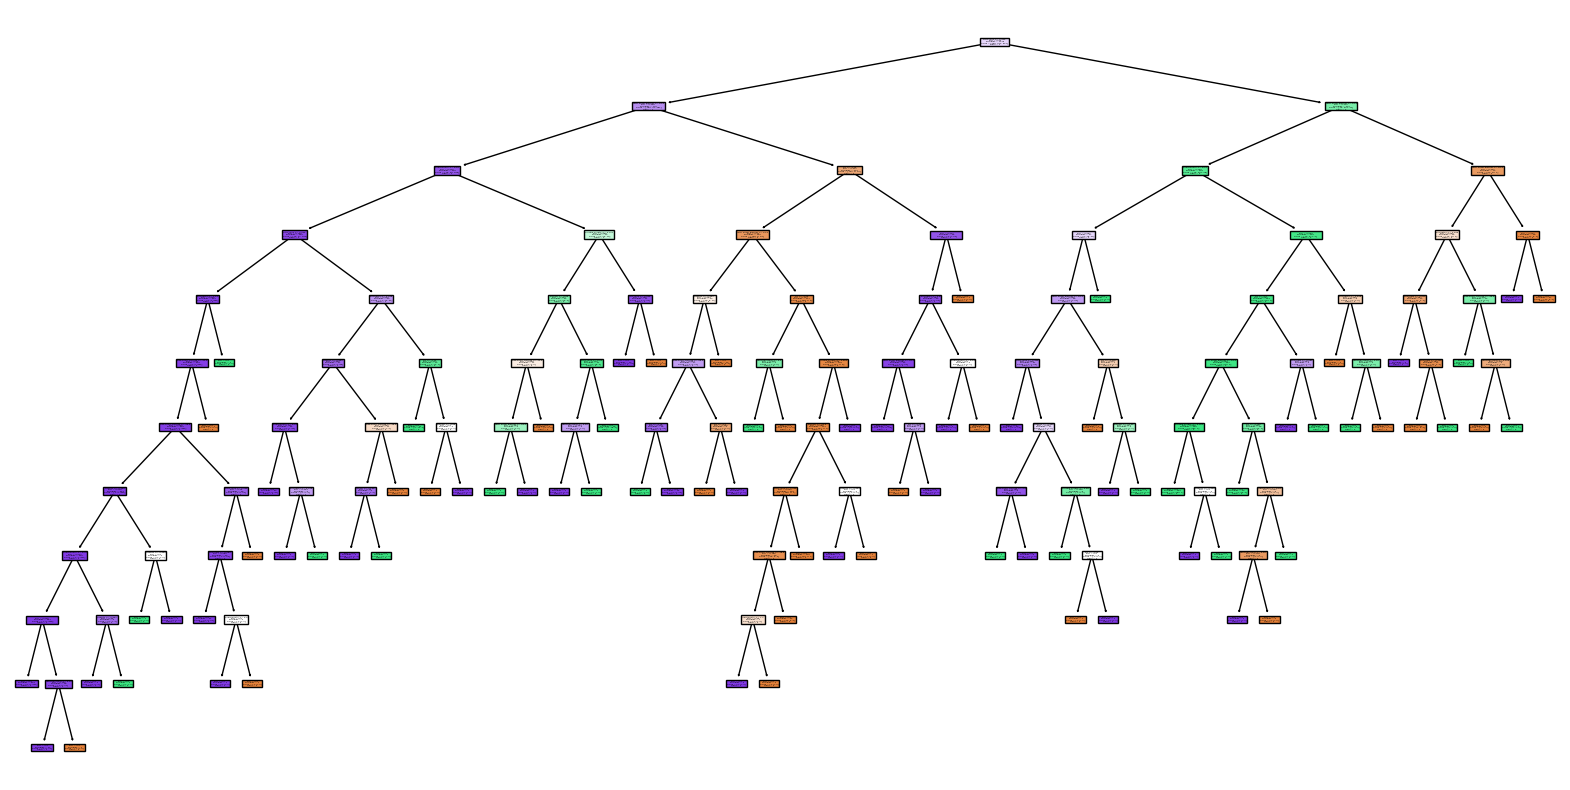

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Read the dataset from CSV file
# Check if the file exists in the current directory or provide the full path
df = pd.read_csv("/content/winequality-red.csv", sep=";")

# Perform k-means clustering
X = df.drop(columns='quality')  # Drop the target column if 'quality' is the target
X_scaled = StandardScaler().fit_transform(X)  # Standardize the features
kmeans = KMeans(n_clusters=3, random_state=1234, n_init=25)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Prepare the data for decision tree
X_tree = df.drop(columns=['cluster'])
y_tree = df['cluster']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tree, y_tree, test_size=0.3, random_state=1234)

# Build the decision tree
tree = DecisionTreeClassifier(random_state=1234)
tree.fit(X_train, y_train)

# Display the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X_tree.columns, class_names=y_tree.unique().astype(str), filled=True)
plt.show()

# Prune the decision tree
#from sklearn.tree import DecisionTreeClassifier # This line is not needed and is causing the error
#from sklearn import tree # This line is not needed and is causing the error

# Define a function to prune the tree
def prune_tree(tree, X, y):
    path = tree.cost_complexity_pruning_path(X, y)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities
    best_alpha = ccp_alphas[impurities.argmin()]
    pruned_tree = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=1234)
    pruned_tree.fit(X, y)
    return pruned_tree

# Prune the tree
pruned_tree = prune_tree(tree, X_train, y_train)

# Plot the pruned decision tree
plt.figure(figsize=(20, 10))
plot_tree(pruned_tree, feature_names=X_tree.columns, class_names=y_tree.unique().astype(str), filled=True)
plt.show()